# Craps Game

O CRAPS é um jogo de dados (famoso em cassinos), em que o jogador lança dois dados, então soma-se as faces dos dados:

- Se a soma for **7 ou 11** na primeira rodada, o *jogador ganha*;
- Se for **2, 3 ou 12** na primeira rodada (ou CRAPS) o *jogador perde*.   
- Se a soma for **4, 5, 6, 8, 9 ou 10** na primeira rodada. Então esta soma se torna o ponto do jogador. 
  - Para ganhar, o jogador continua jogando o dado até a soma ser igual a seu ponto. 
  - O jogador perde se a soma for igual a 7.

In [1]:
# to run graphic
%matplotlib inline 
from matplotlib import animation
from IPython.display import HTML
import sys

# Importações necessárias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Função responsável por rolar dados
def roll_dice():
    """Função que rola dois dados.

    Returns:
        tuple: retorno é uma tupla com o resultado empacotado.
    """
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2)


# Função que mostra o valor dos dados
def display_dice(dice):
    """Exibe na tela os dados e a respectiva soma.

    Args:
        dice (tuple): Uma tupla com valor de cada dado sorteado.
    """
    die1, die2 = dice
    print(f'Result: {die1} + {die2} = {sum(dice)}')


# Função do jogo CRAPS
def craps():
    """Função que realiza uma rodada do jogo CRAPS7

    Returns: 
        tuple: 1º - round em que ganhou ou perdeu; 2º - vitória ou derrota.
    """

    die_values = roll_dice()  # primeira rodada
    # display_dice(die_values)

    sum_dies = sum(die_values)

    roll = 1

    if sum_dies in (7, 11):  # condição de vitória
        game_status = 'WON'
    elif sum_dies in (2, 3, 12):  # condição de derrota
        game_status = 'LOSE'
    else:  # segue o jogo
        game_status = 'CONTINUE'
        player_point = sum_dies
        # print(f'My point is {player_point}')

    # looping até chegar condição de vitoria ou derrota
    while game_status == 'CONTINUE':
        die_values = roll_dice()  # outras rodadas
        # display_dice(die_values)
        sum_dies = sum(die_values)

        if roll > 11:
            roll = 12
        else:
            roll += 1

        if sum_dies == player_point:
            game_status = 'WON'
        elif sum_dies == 7:
            game_status = 'LOSE'

    # Mensagem de vitória ou derrota
    if game_status == 'WON':
        # print(f'Congratulations, you WIN in {roll}º round!')
        return (roll, game_status)
    else:
        # print(f'You LOSE in {roll}º round, try again!')
        return (roll, game_status)

## Exercício proposto

Reimplemente sua solução para o Exercício da aula anterior (Analisando Craps), usando as técnicas que você aprendeu para criar um gráfico de barras dinâmico mostrando as vitórias e derrotas no primeiro lançamento, segundo lançamento terceiro, etc.

## Plotagem do gráfico

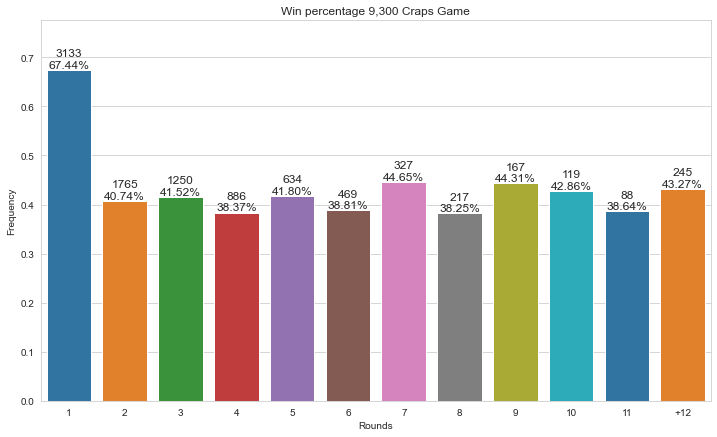

In [17]:
def update(frame_number, rolls_frame, rounds, r_vit, r_der, rolls):
    for i in range(rolls_frame):
        # Realizar "i" jogos CRAPS
        turn, status = craps()

        if turn < 12:
            rolls[turn - 1] += 1
            if status == 'WON':
                r_vit[turn - 1] += 1
        else:
            rolls[11] += 1
            if status == 'WON':
                r_vit[11] += 1

    # Definir frequencia de cada round
    frequencies = [r_vit[x]/rolls[x] for x in range(len(r_vit))]       

    # reconfigure plot for updated die frequencies
    plt.cla()  # clear old contents contents of current Figure
    axes = sns.barplot(rounds, frequencies, palette='tab10')  # new bars
    axes.set_title(f'Win percentage {sum(rolls):,} Craps Game')
    axes.set(xlabel='Rounds', ylabel='Frequency')  
    axes.set_ylim(top=max(frequencies) * 1.15)  # scale y-axis by 10%

    # display frequency & percentage above each patch (bar)
    cont = 0
    for bar, frequency in zip(axes.patches, frequencies):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height() 
        text = f'{rolls[cont]}\n{frequency:.2%}'
        cont += 1
        axes.text(text_x, text_y, text, fontsize=12, ha='center', va='bottom')


# ---------------------------------------------------------------------------------
# Inicio aqui
# ---------------------------------------------------------------------------------
# Número de rodadas [(number_of_frames * rolls_per_frame) + rolls_per_frame]
number_of_frames = 30
rolls_per_frame = 300

figure = plt.figure('Analyzing Craps Game', figsize=(12, 7))  # Figure for animation
sns.set_style('whitegrid')  # white background with gray grid lines
values = list(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '+12'])  # round number for display on x-axis

rolls = [0] * 12 
r_vit = [0] * 12
r_der = [0] * 12

# configure and start animation that calls function update
craps_animation = animation.FuncAnimation (
    figure, update, repeat=False, frames=number_of_frames, interval=33, fargs=(rolls_per_frame, values, r_vit, r_der, rolls)
)

HTML(craps_animation.to_jshtml())

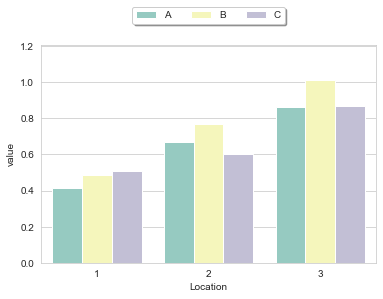

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)
cdf = pd.concat([data1, data2, data3])
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
ax = sns.barplot(x="Location", y="value", hue="Letter", data=mdf, errwidth=0)  
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.show()

In [25]:
cdf

,A,B,C,Location
0,0.487348,0.602327,0.011695,1
1,0.214777,0.525489,0.562903,1
2,0.910111,0.481438,0.010442,1
3,0.001436,0.227318,0.858220,1
4,0.859404,0.528742,0.870443,1
5,0.064608,0.180462,0.754913,1
6,0.668819,0.895473,0.722020,1
7,0.705015,0.717392,0.915853,1
8,0.064438,0.902097,0.872272,1
9,0.265237,0.298172,0.140006,1


In [21]:
mdf

,Location,Letter,value
0,1,A,0.487348
1,1,A,0.214777
2,1,A,0.910111
3,1,A,0.001436
4,1,A,0.859404
...,...,...,...
148,3,C,1.098339
149,3,C,0.504089
150,3,C,1.022065
151,3,C,1.207008
